<a href="https://colab.research.google.com/github/AlisaLiberman3124/alisaliberman/blob/homework06/Homework06_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вторая часть


Задание 1
1.  Загрузите датасет music_genre.csv. 
2.   Возьмите 20 тысяч случайных строк из датасета (все остальные задания выполняйте для этих 20 тысяч строк!!!) 
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце artist_name – empty_field. Если есть, выведите эти строки и их количество. А затем удалите из датасета.


In [2]:
#1.1
library(dplyr)
df <- read.csv('music_genre.csv')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#1.2
df <- sample_n(df, 20000)

In [4]:
#1.3
df <- distinct(df)

In [5]:
#1.4
nrow(df[df$artist_name == 'empty_field', ])
new_df <- subset(df, artist_name!='empty_field')
new_df <- na.omit(new_df)
new_df

[1] 995

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,22362,Paul Rodgers,Alright Now,37,2.49e-01,0.623,269816,0.5520,1.75e-03,D,0.1930,-7.657,Major,0.0727,120.58200000000001,4-Apr,0.7890,Blues
2,79301,Cypress Hill,I Wanna Get High,56,7.73e-02,0.734,174600,0.5250,3.03e-01,D#,0.0734,-14.826,Minor,0.2700,81.936,4-Apr,0.3320,Rap
3,90552,Dylan Scott,Nothing To Do Town,70,2.49e-02,0.551,185413,0.8360,1.33e-05,D,0.2220,-5.182,Major,0.0338,147.954,4-Apr,0.9110,Country
4,80897,Nogizaka46,Kaerimichiwa Toomawarishitakunaru,38,4.61e-01,0.510,269707,0.8570,0.00e+00,C#,0.0793,-2.716,Major,0.0404,138.064,4-Apr,0.6840,Anime
5,69113,Kendrick Lamar,Chapter Six,53,5.33e-01,0.510,161138,0.5370,0.00e+00,E,0.1850,-11.297,Minor,0.0823,67.9,4-Apr,0.6700,Rap
6,31088,Panic! At The Disco,High Hopes - Don Diablo Remix,71,2.16e-02,0.590,185714,0.8880,0.00e+00,F,0.4870,-2.851,Major,0.0765,126.094,4-Apr,0.2880,Rock
7,31044,YUNGBLUD,Psychotic Kids,62,5.71e-02,0.550,-1,0.9080,0.00e+00,D,0.1420,-3.922,Minor,0.0745,75.003,4-Apr,0.4880,Rock
8,72618,Kodak Black,The Recipe,51,4.03e-02,0.847,199329,0.5260,0.00e+00,C#,0.1650,-6.821,Minor,0.3040,139.977,4-Apr,0.2190,Rap
9,44002,Current Joys,A Different Age,54,6.37e-01,0.627,412418,0.3710,6.43e-02,D,0.0759,-10.621,Major,0.0269,143.935,4-Apr,0.3610,Rock


Задание 2
1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [6]:
#2.1
new_df <- na.omit(new_df)
genre_dol <- prop.table(table(df$music_genre))

print(genre_dol)


              Alternative        Anime        Blues    Classical      Country 
0.0000500025 0.0983049152 0.1026551328 0.1002550128 0.0986049302 0.0991049552 
  Electronic      Hip-Hop         Jazz          Rap         Rock 
0.0985549277 0.1000050003 0.1035051753 0.0987549377 0.1002050103 


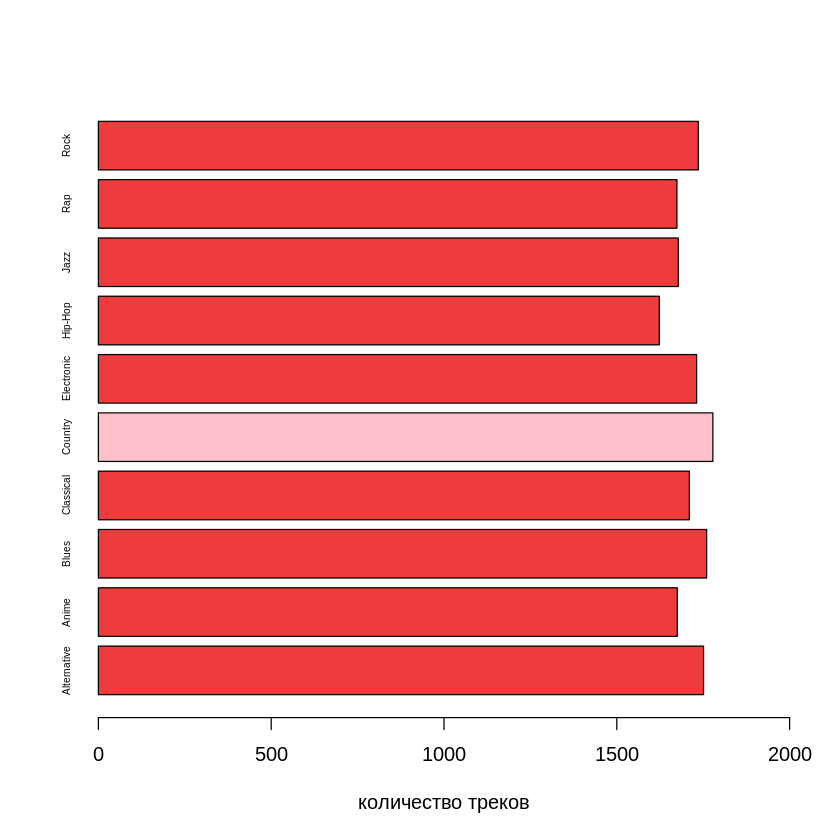

In [87]:
#2.2
x <- table(new_df$music_genre)
cols <- c("brown2", "pink")[1+(x==max(x))]
barplot(x, col=cols, horiz=TRUE,
cex.names=0.5,
xlab = 'количество треков',
xlim = c(0, 2000))

In [13]:
#2.3
danceg <- new_df %>% 
  group_by(music_genre) %>% 
  summarize(meand = mean(danceability))

mostg <- danceg %>% 
  arrange(desc(meand)) %>% 
  head(1)

cat(mostg$music_genre, "\n")
cat(mostg$meand, "\n")

Hip-Hop 
0.71704 


In [89]:
#2.4
genres <- unique(df$music_genre)
genres <- genres[genres != ""]

mood <- c()
quantity <- c()

for (genre in genres) {
  temp <- subset(df, music_genre == genre)
  
  mag <- sum(temp$mode == 'Major', na.rm = TRUE)
  min_m <- sum(temp$mode == 'Minor', na.rm = TRUE)
  
  mood <- c(mood, ifelse(mag > min_m, "Major", "Minor"))
  quantity <- c(quantity, ifelse(mag > min_m, mag, min_m))
}

df_ <- data.frame(genre = as.character(genres), mode = as.character(mood), quantity = as.numeric(quantity))
df_

genre,mode,quantity
<chr>,<chr>,<dbl>
Electronic,Major,2692
Anime,Major,3101
Jazz,Major,2648
Alternative,Major,3167
Country,Major,4362
Rap,Major,2763
Blues,Major,3563
Rock,Major,3698
Classical,Major,3328


Задание 3
1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [30]:
#3.1
new_df <- na.omit(new_df)
mostt <- names(sort(table(new_df$artist_name), decreasing = TRUE)[1])
counterm <- max(table(new_df$artist_name))
cat( mostt, "(", counterm, "треков)\n")

leastt <- names(sort(table(new_df$artist_name))[1])
counterl <- min(table(new_df$artist_name))
cat(leastt, "(", counterl, "трек)\n")

Nobuo Uematsu ( 178 треков)
"Weird Al" Yankovic ( 1 трек)


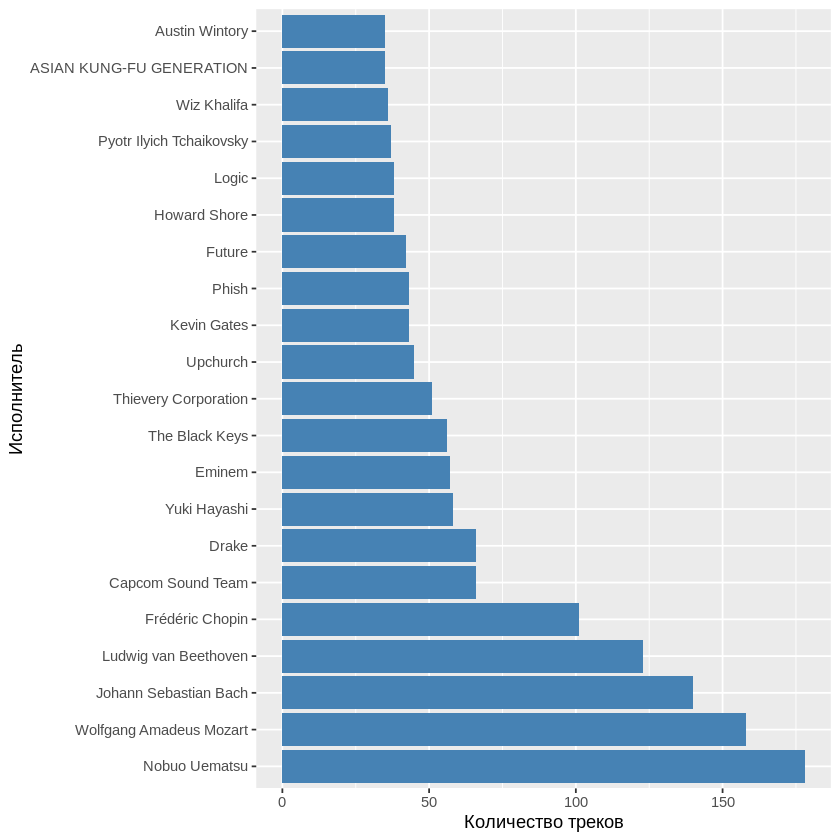

In [33]:
library(ggplot2)

top_artists <- new_df %>%
  group_by(artist_name) %>%
  summarize(total_songs = n()) %>%
  top_n(20, total_songs) %>%
  arrange(desc(total_songs))

ggplot(top_artists, aes(y = reorder(artist_name, -total_songs), x = total_songs)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme(axis.text.y = element_text(hjust = 1)) +
  xlab("Количество треков") +
  ylab("Исполнитель")

Задание 4
1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,22362,37,0.2490,0.623,269816,0.552,1.75e-03,0.1930,-7.657,0.0727,0.789
2,79301,56,0.0773,0.734,174600,0.525,3.03e-01,0.0734,-14.826,0.2700,0.332
3,90552,70,0.0249,0.551,185413,0.836,1.33e-05,0.2220,-5.182,0.0338,0.911
4,80897,38,0.4610,0.510,269707,0.857,0.00e+00,0.0793,-2.716,0.0404,0.684
5,69113,53,0.5330,0.510,161138,0.537,0.00e+00,0.1850,-11.297,0.0823,0.670
6,31088,71,0.0216,0.590,185714,0.888,0.00e+00,0.4870,-2.851,0.0765,0.288


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000,0.013,0.001,0.003,-0.011,0.008,-0.007,0.013,0.008,0.004,0.000
popularity,0.013,1.000,-0.288,0.364,-0.080,0.212,-0.369,-0.042,0.313,0.233,0.117
acousticness,0.001,-0.288,1.000,-0.353,0.071,-0.792,0.398,-0.101,-0.734,-0.166,-0.270
danceability,0.003,0.364,-0.353,1.000,-0.158,0.269,-0.312,-0.053,0.391,0.286,0.435
duration_ms,-0.011,-0.080,0.071,-0.158,1.000,-0.074,0.143,0.024,-0.110,-0.086,-0.130
energy,0.008,0.212,-0.792,0.269,-0.074,1.000,-0.395,0.179,0.840,0.160,0.400


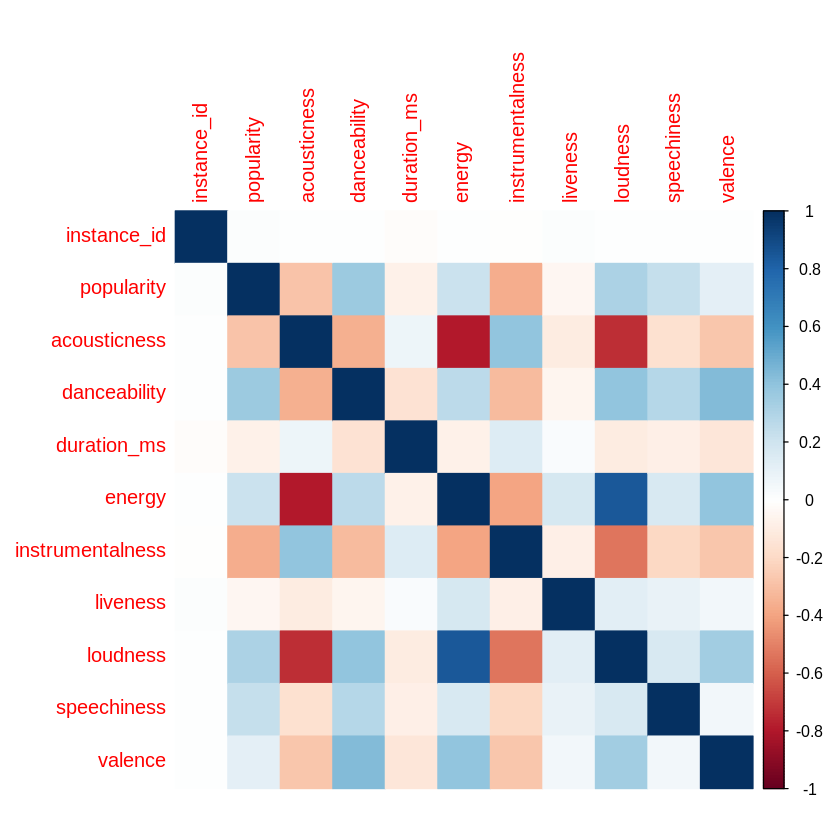

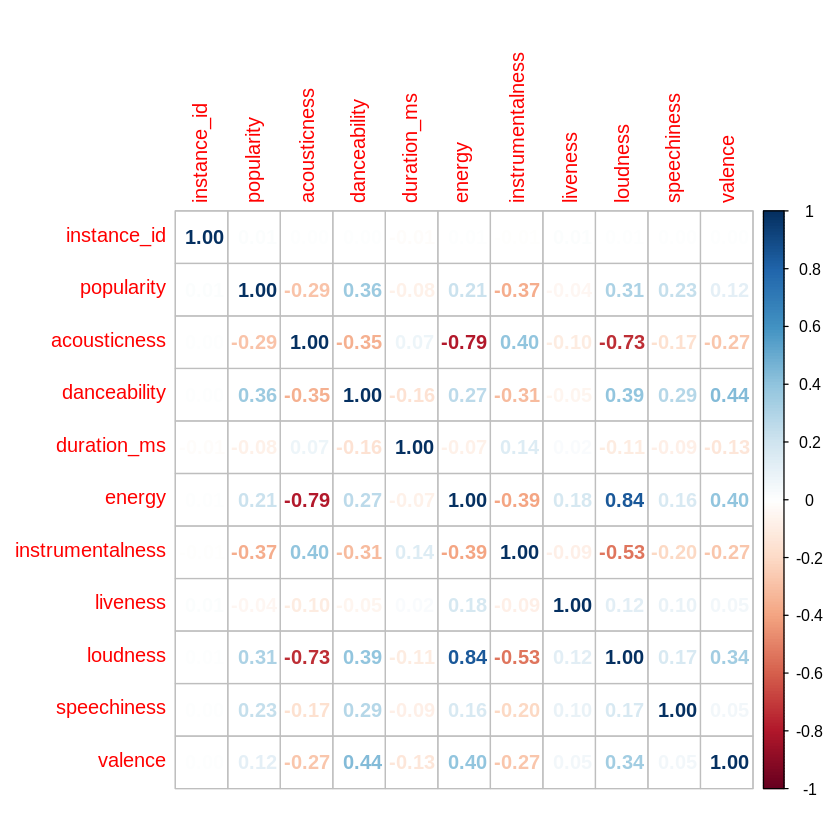

In [10]:
#4.1
new_df <- na.omit(new_df)
install.packages("corrplot")
library(corrplot)

corr_df <- select_if(new_df, is.numeric)
head(corr_df)
M<-cor(corr_df, use="pairwise.complete.obs")
head(round(M,3))
corrplot(M, method="color")
corrplot(M, method="number")

In [35]:
#4.2
cor_df <- select_if(new_df, is.numeric)
cat(cor(new_df$popularity, new_df$duration_ms, use = "complete.obs"))

-0.08076086

Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

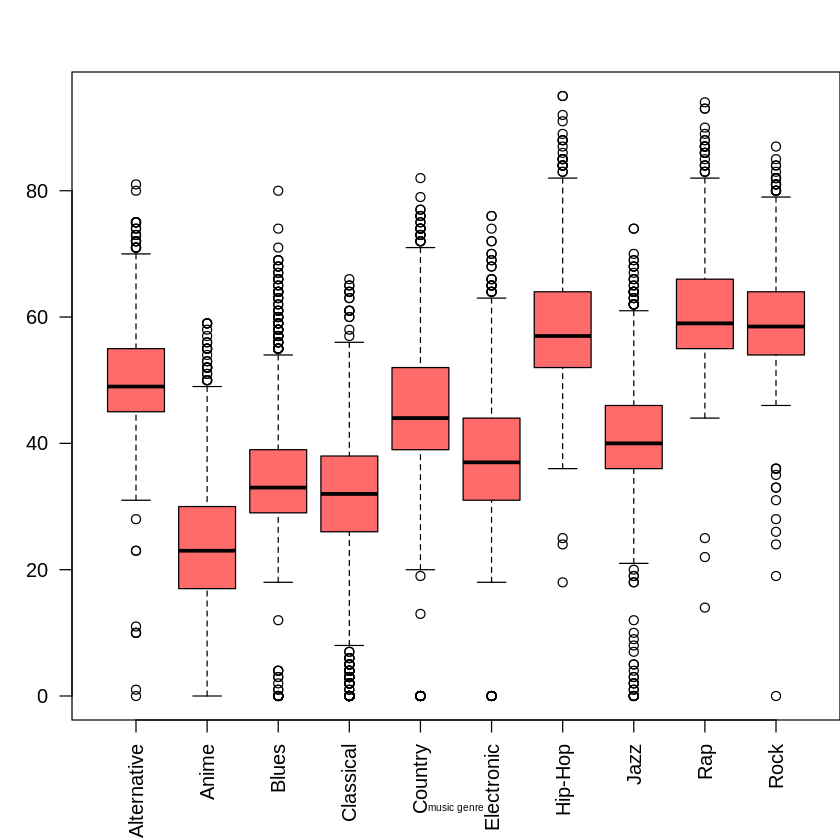

In [41]:
par(mar=c(5,3,3,0))
boxplot(popularity ~ music_genre, data = new_df,
        las=2,
        xlab = "music genre",
        ylab = "popularity",
        col = "indianred1",
        cex.lab=0.5)

Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

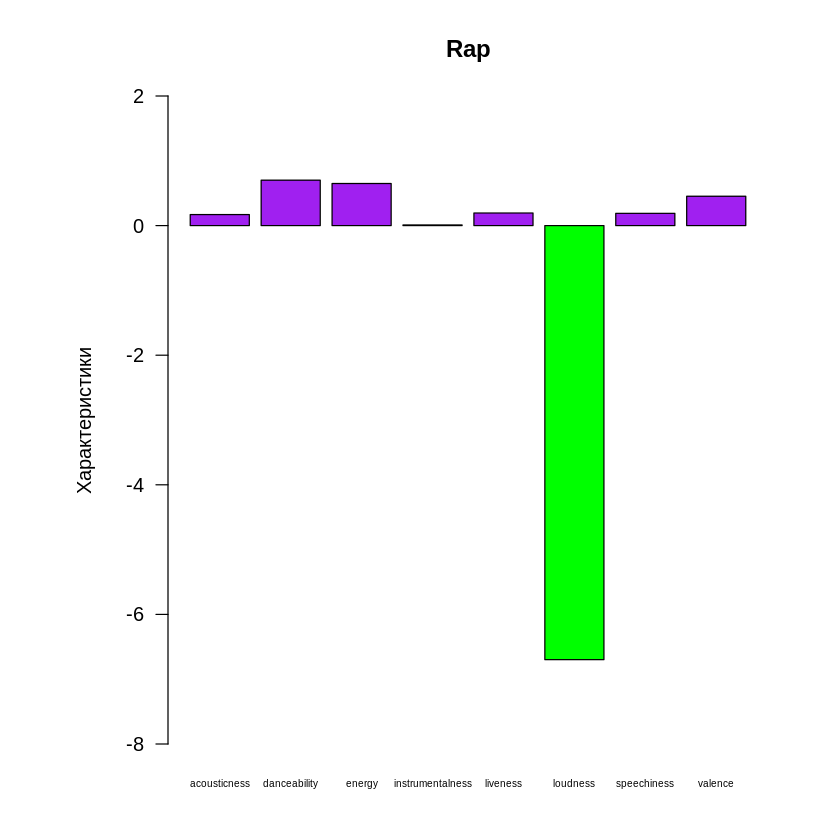

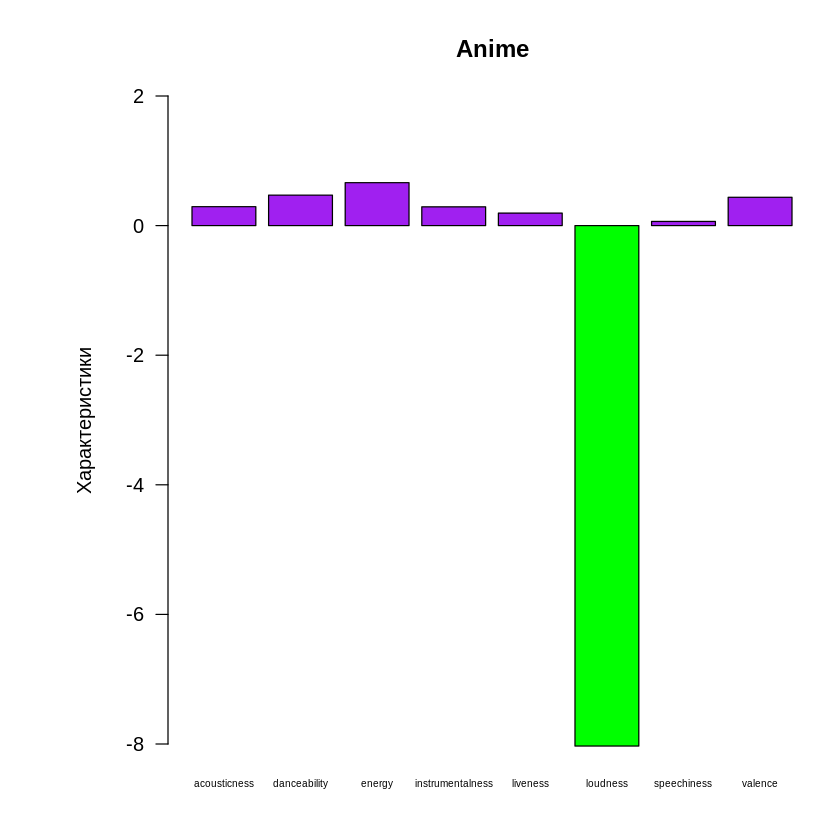

In [9]:
new_df <- na.omit(new_df)
df <- new_df
grouped <- df %>% group_by(music_genre)  %>%
                      summarise(status = mean(popularity))  # складываем тот же датасет, сгруппированный по жанрам и средним значениям популярности

most_popular <- (grouped %>% filter(max(status) == status))[[1]]
least_popular <- (grouped %>% filter(min(status) == status))[[1]]  #Находим по табличке самый популярный и самый непопулярный жанр с помощью фильтрации и извлекаем строки с этими жанрами из датасета
ee <- subset(df, music_genre == most_popular)
yy <- subset(df, music_genre == least_popular)

ee <- ee[,!names(ee) %in% c("instance_id", "popularity", "duration_ms")]
yy <- yy[,!names(yy) %in% c("instance_id", "popularity", "duration_ms")]

ee <- ee[ , unlist(lapply(ee, is.numeric))]    # Identify numeric columns
yy <- yy[ , unlist(lapply(yy, is.numeric))] 

X <- as.numeric(unlist(colMeans(ee)))  # Извлекаем для таблицы самого популярного жанра средние значения по каждому столбцу и названия столбцов
Y <- names(unlist(colMeans(ee)))

colors = list()
for(i in 1:length(X)) {                                    
  if (X[i] < 0) {
    colors[[length(colors) + 1]] <- 'green'
  } else {
    colors[[length(colors) + 1]] <- 'purple'
  }                           
}
v = unlist(c(colors))

par(mar=c(4,7,4,3))
barplot(X,names.arg=c(Y),
ylab="Характеристики",
col=v, 
main=most_popular, 
beside = TRUE, 
cex.names=0.5, 
ylim = c(-8, 2), 
las=1)

X <- as.numeric(unlist(colMeans(yy)))
Y <- names(unlist(colMeans(yy)))

colors = list()
for(i in 1:length(X)) {                                    
  if (X[i] < 0) {
    colors[[length(colors) + 1]] <- 'green'
  } else {
    colors[[length(colors) + 1]] <- 'purple'
  }                           
}
v = unlist(c(colors))

par(mar=c(4,7,4,1))
barplot(X,names.arg=c(Y),
ylab="Характеристики",
col=v, 
main=least_popular, 
beside = TRUE, 
cex.names=0.5, 
ylim = c(-8, 2), 
las=1)

Задание 8
1. Добавьте в данные категориальный столбец длительность_трека, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min).
2. Покажите график плотности распределения данных в столбце loudness, сгруппированных по категориям длительности.
3. На круговой диаграмме покажите численное соотношение треков разной длительности.

In [63]:
#8.1
new_df$длительность_трека <- cut(new_df$duration_ms/1000/60, 
                                      breaks = c(0, 3, 5, Inf), 
                                      labels = c("короткая", "средняя", "длинная"))
new_df <- subset(new_df, длительность_трека!='NA')

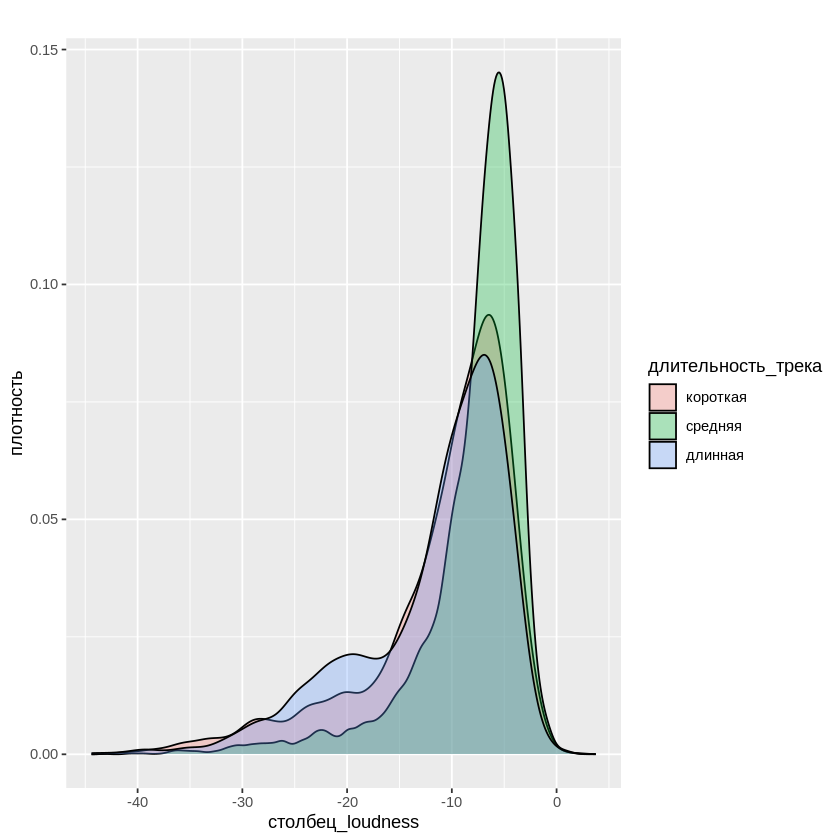

In [53]:
#8.2
ggplot(new_df, aes(x = loudness, fill = длительность_трека)) + 
  geom_density(alpha = 0.3) +
  xlab("столбец_loudness") +
  ylab("плотность") +
  ggtitle("")

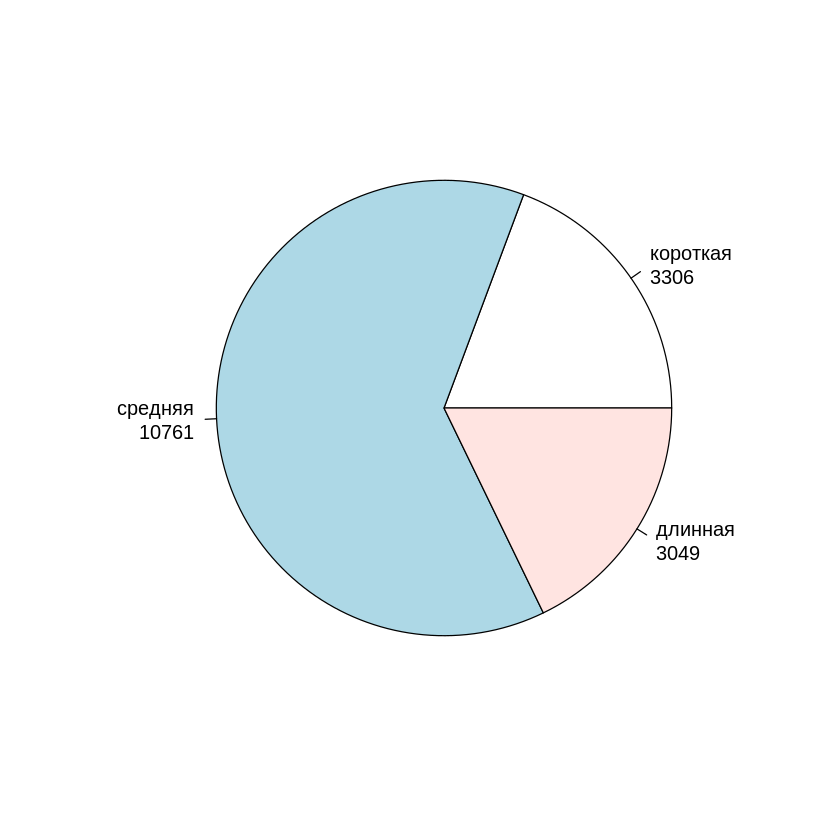

In [68]:
#8.3
library(dplyr)
df <- read.csv('music_genre.csv')

data <- table(new_df$длительность_трека)
labels <- paste(names(data), "\n", data, sep="")
pie(data, labels=labels)